# Задача 2. Сравнение методов классификации

* **Дедлайн**: 20.11.2022, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 9

## Задача

- [x] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- [x] Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Демо блокнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).
- [x] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [x] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [x] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- [x] Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).
- [x] Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
- [x] * (**+2 балла**) Реализовать еще один из методов классификации и добавить его в сравнение.
- [x] * (**+2 балла**) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

## Выполнил: Иванов Кирилл Андреевич (19.Б11-мм)

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
from scipy import stats

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<IPython.core.display.Javascript object>

# Предсказание сердечного заболевания

In [3]:
df = pd.read_csv("../data/heart_disease/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<IPython.core.display.Javascript object>

### Характеристики 

- age: in years
- sex: 1 = male; 0 = female
- cp: chest pain type (4 values)
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defec
- target: 1=yes, 0=no

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<IPython.core.display.Javascript object>

In [5]:
df.shape

(1025, 14)

<IPython.core.display.Javascript object>

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<IPython.core.display.Javascript object>

Пропусков нет

In [7]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

<IPython.core.display.Javascript object>

Нетрудно заметить, что классы целевого признака сбалансированы

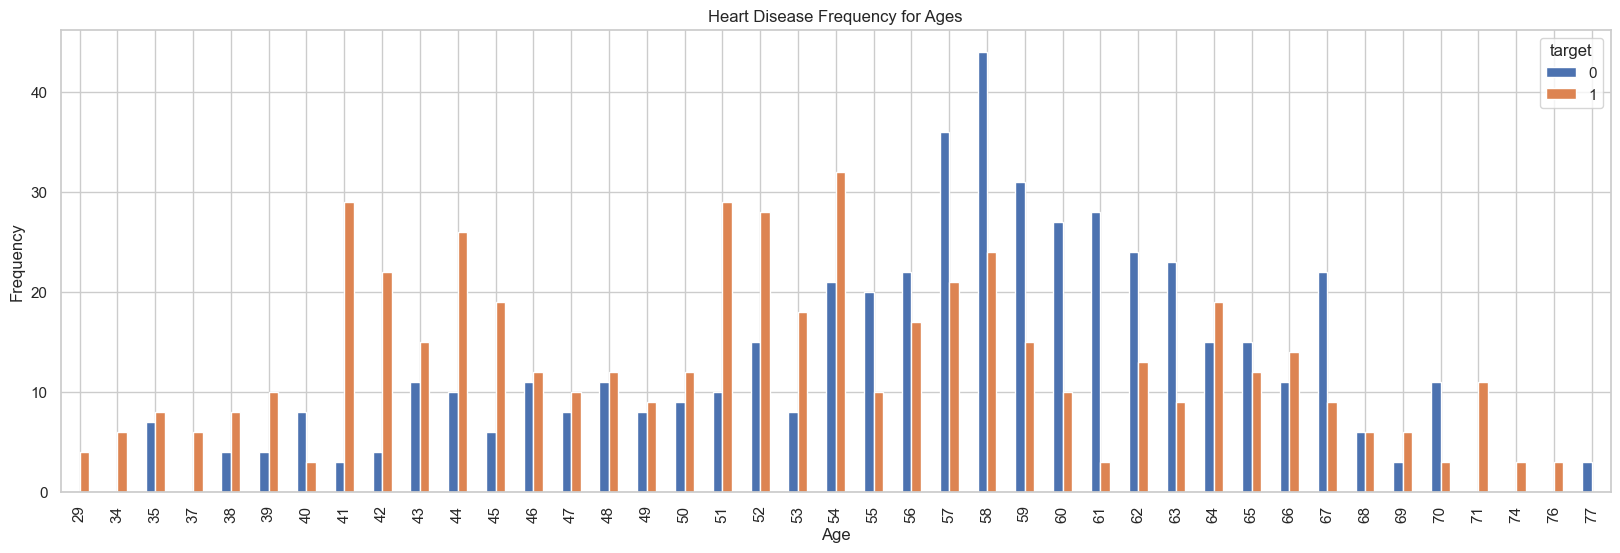

<IPython.core.display.Javascript object>

In [8]:
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(20, 6))
plt.title("Heart Disease Frequency for Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

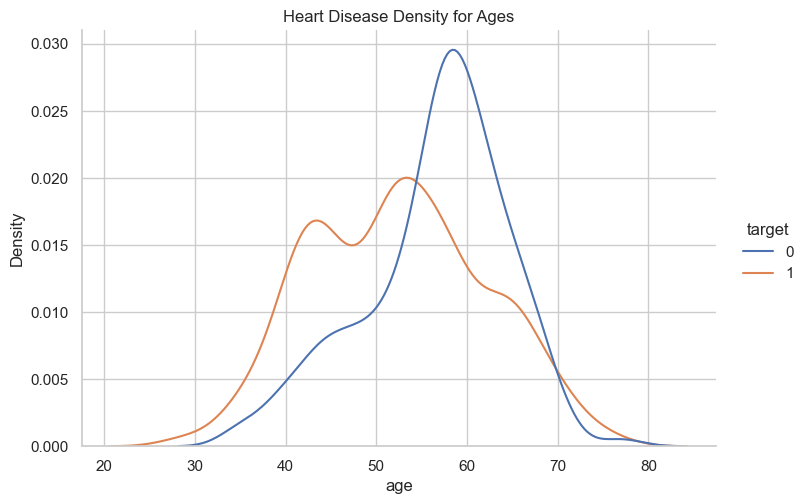

<IPython.core.display.Javascript object>

In [9]:
ax = sns.displot(x="age", data=df, kind="kde", hue="target", height=5, aspect=1.5)
plt.title("Heart Disease Density for Ages")
plt.show()

Заметим, что количество выявленных сердечных заболеваний максимально в диапазоне возрастов от 40 до 54 лет. В то же время большое количество людей в возрасте от 55 до 63 не имеет заболеваний сердца.

Text(0.5, 0, 'Sex (0 = Female, 1 = Male)')

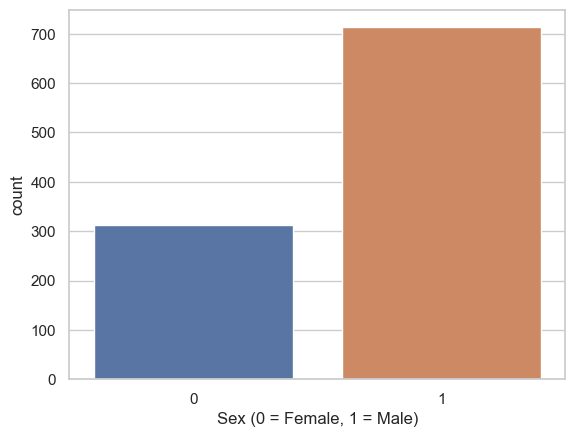

<IPython.core.display.Javascript object>

In [10]:
sns.countplot(x="sex", data=df)
plt.xlabel("Sex (0 = Female, 1 = Male)")

Заметим, что в выборке мужчин более чем в два раза больше, чем женщин

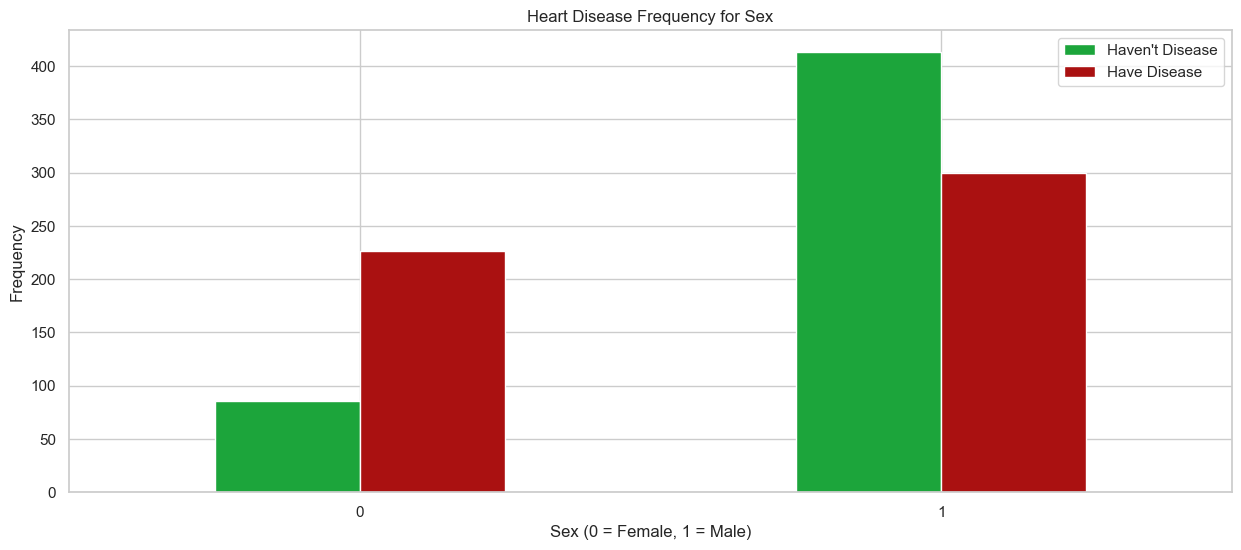

<IPython.core.display.Javascript object>

In [11]:
pd.crosstab(df.sex, df.target).plot(
    kind="bar", figsize=(15, 6), color=["#1CA53B", "#AA1111"]
)
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel("Frequency")
plt.show()

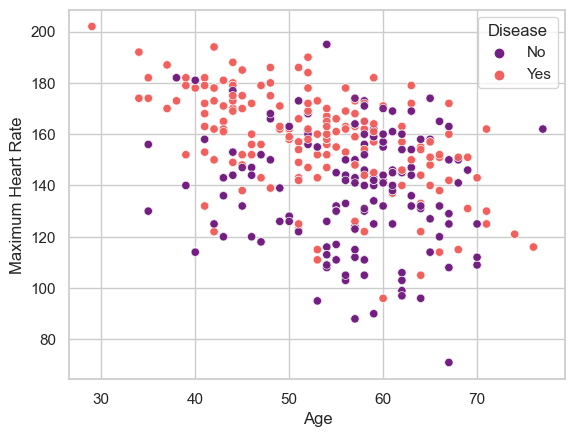

<IPython.core.display.Javascript object>

In [12]:
ax = sns.scatterplot(
    x="age", y="thalach", data=df, hue="target", palette="magma", alpha=0.9
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No", "Yes"], title="Disease")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Заметим, что в молодом возрасте учащенное сердцебиение часто указывает на наличие сердечного заболевания

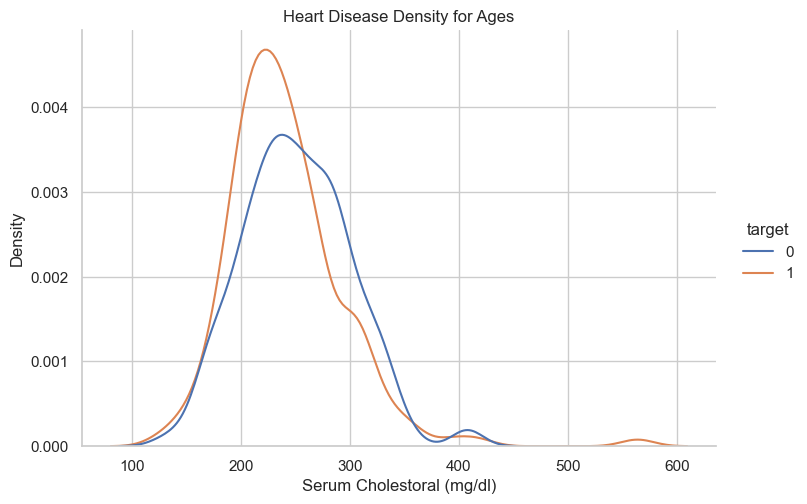

<IPython.core.display.Javascript object>

In [13]:
ax = sns.displot(x="chol", data=df, kind="kde", hue="target", height=5, aspect=1.5)
plt.title("Heart Disease Density for Ages")
plt.xlabel("Serum Cholestoral (mg/dl)")
plt.show()

Существенной зависимости между повышенным холестерином и наличием сердечных заболеваний не выявлено

Text(0.5, 0, 'Fasting Blood Sugar (0 if <= 120 mg/dl, 1 if > 120 mg/dl)')

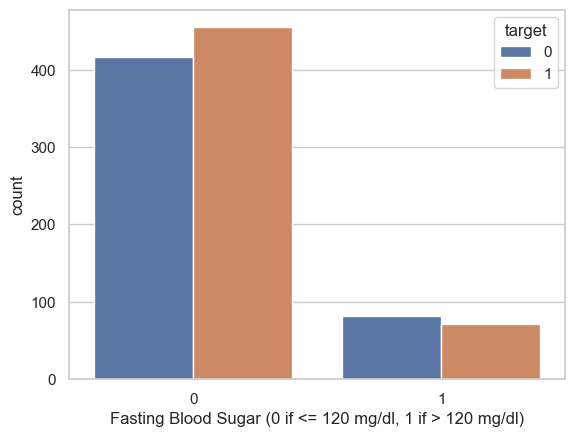

<IPython.core.display.Javascript object>

In [14]:
sns.countplot(x="fbs", data=df, hue="target")
plt.xlabel("Fasting Blood Sugar (0 if <= 120 mg/dl, 1 if > 120 mg/dl)")

Text(0.5, 0, 'Number Of Major Vessels (0-3) Colored By Flourosopy')

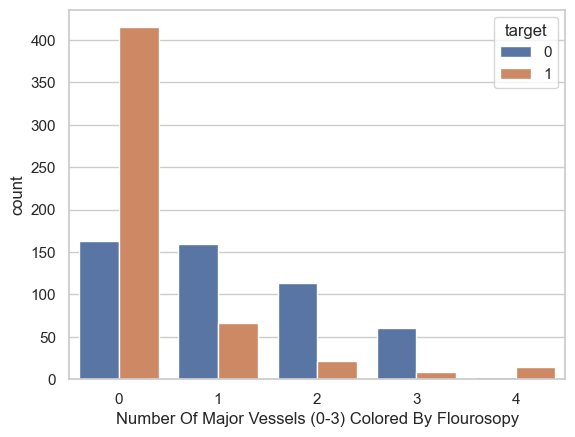

<IPython.core.display.Javascript object>

In [15]:
sns.countplot(x="ca", data=df, hue="target")
plt.xlabel("Number Of Major Vessels (0-3) Colored By Flourosopy")

Заметим, что в нулевой категории количества крупных сосудов количество человек с сердечным заболеванием значительно больше, чем тех, у кого их нет

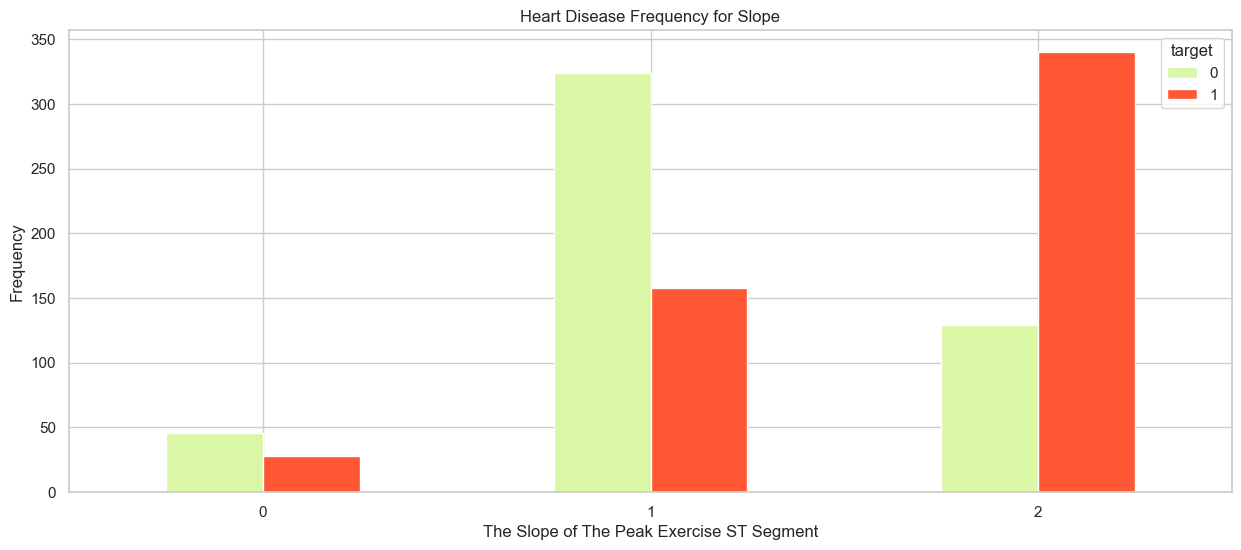

<IPython.core.display.Javascript object>

In [16]:
pd.crosstab(df.slope, df.target).plot(
    kind="bar", figsize=(15, 6), color=["#DAF7A6", "#FF5733"]
)
plt.title("Heart Disease Frequency for Slope")
plt.xlabel("The Slope of The Peak Exercise ST Segment")
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.show()

Лица, попадающие во вторую категорию "The Slope of The Peak Exercise ST Segment" с большой вероятностью имеют сердечное заболевание.

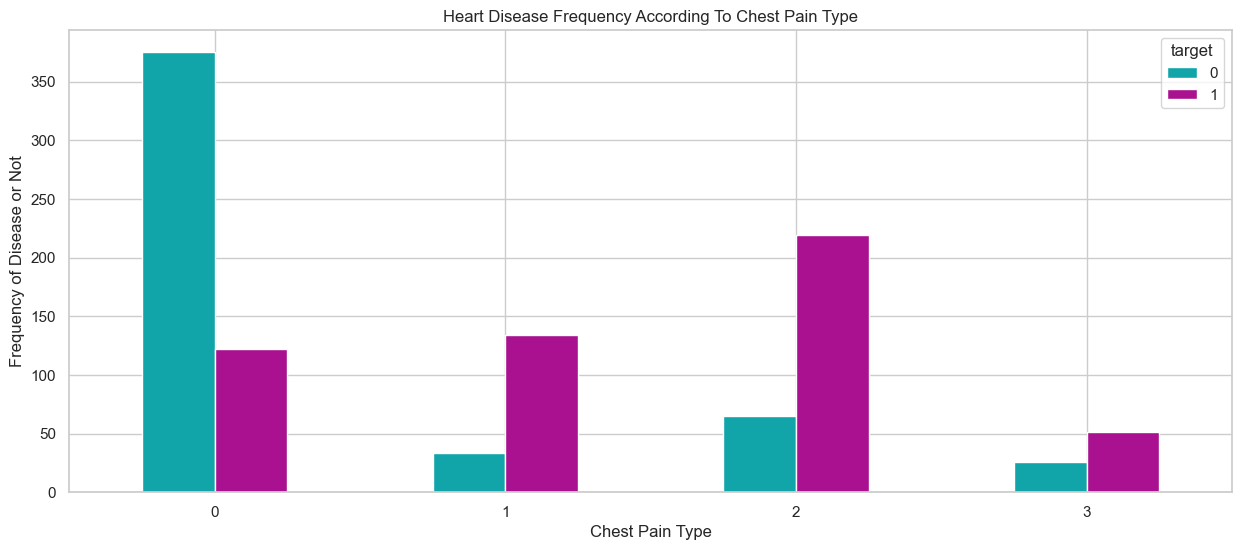

<IPython.core.display.Javascript object>

In [17]:
pd.crosstab(df.cp, df.target).plot(
    kind="bar", figsize=(15, 6), color=["#11A5AA", "#AA1190"]
)
plt.title("Heart Disease Frequency According To Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not")
plt.show()

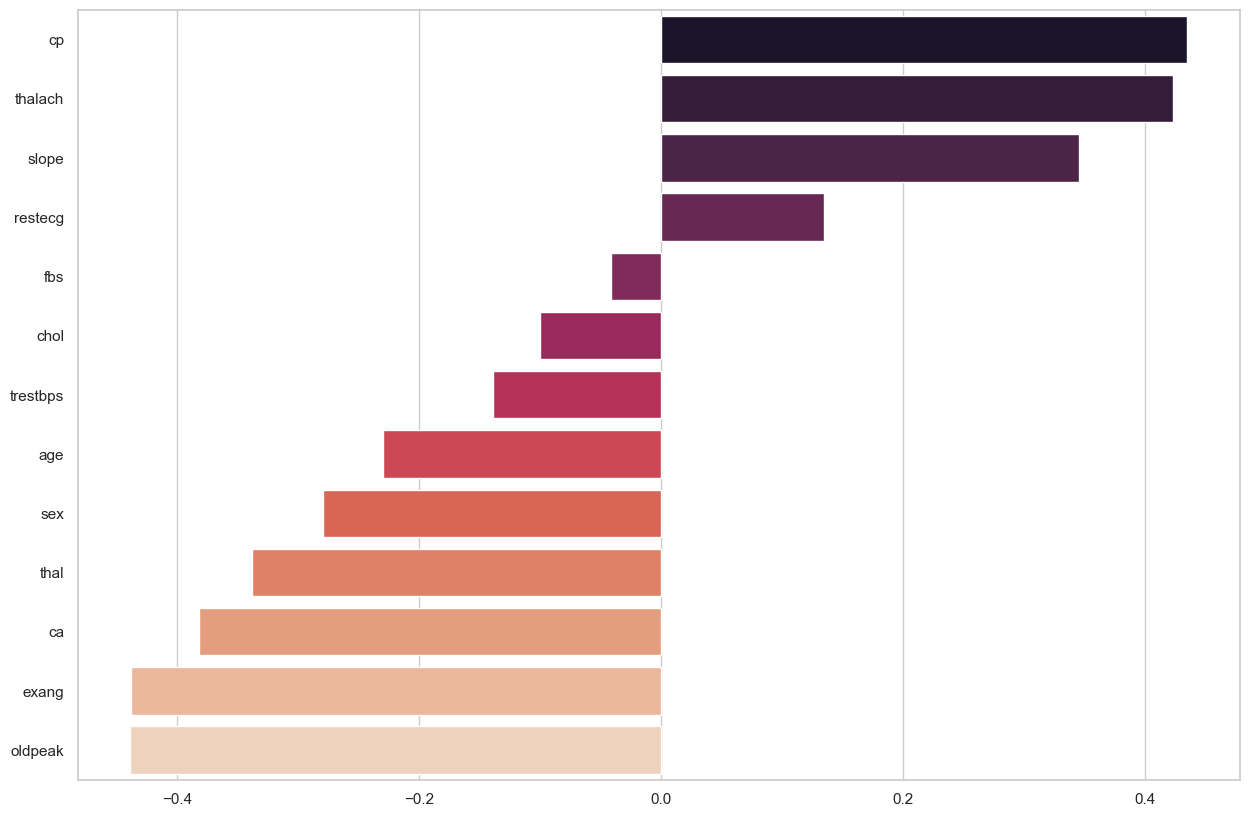

<IPython.core.display.Javascript object>

In [18]:
y = df["target"]
X = df.drop(columns=["target"])

numeric_data = X.select_dtypes([np.number])
numeric_data = X.select_dtypes([np.number])
numeric_features = numeric_data.columns

correlations = X[numeric_features].corrwith(y).sort_values(ascending=False)
palette = sns.color_palette("rocket", correlations.size)
plot = sns.barplot(y=correlations.index, x=correlations, palette=palette)
plot.figure.set_size_inches(15, 10)

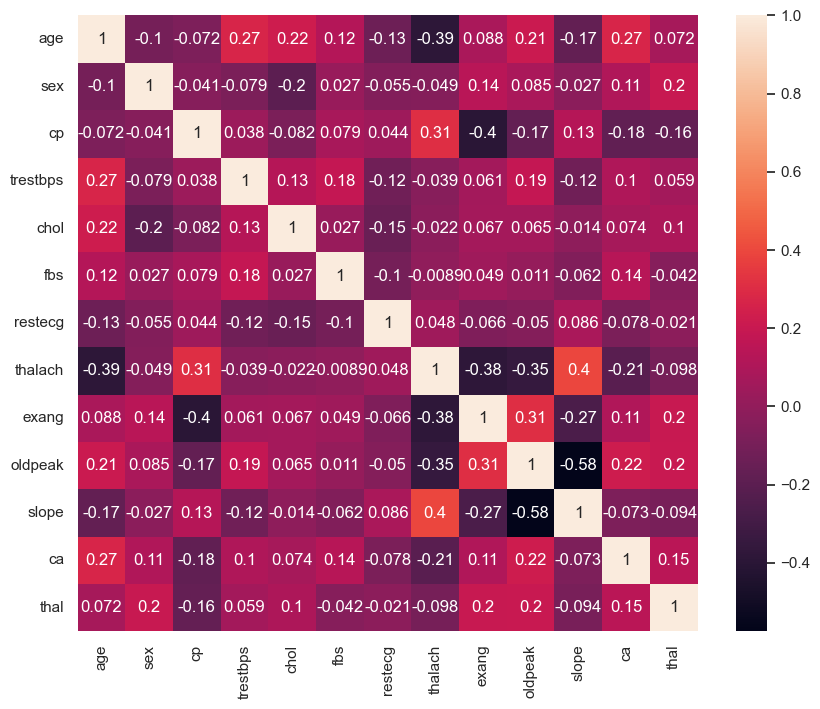

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(X[numeric_features].corr(), annot=True)
plt.show()

Заметим, что наиболее сильно целевой признак коррелирует с "cp", "thalach", "exang" и "oldpeak".

## Построение моделей

### Feature Engineering

Преобразуем признаки sex, cp, fbs, restecg, exang, ca, thal в категориальные

In [20]:
to_cat = ["sex", "cp", "fbs", "restecg", "exang", "ca", "thal"]

df[to_cat] = df[to_cat].astype("category")

<IPython.core.display.Javascript object>

In [21]:
y = df["target"]
X = df.drop(columns=["target"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

numeric_data = X.select_dtypes([np.number])
cat_data = X.select_dtypes(["category"])
numeric_features = numeric_data.columns
cat_features = cat_data.columns

<IPython.core.display.Javascript object>

In [22]:
from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

<IPython.core.display.Javascript object>

### Пайплайны

Каждый пайплайн состоит из следующих шагов: 
1. Scaling and OHE Encoding; 
2. RFE;
3. Classification.

In [23]:
from sklearn.metrics import accuracy_score

accuracies = {}

<IPython.core.display.Javascript object>

In [24]:
from src import DecisionTreeClassifier as MyDecisionTree, KNeighborsClassifier as MyKNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


def create_column_transformer():
    column_transformer = ColumnTransformer(
        [
            ("ohe", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_features),
            ("scaling", StandardScaler(), numeric_features),
        ]
    )
    return column_transformer


def create_logistic_regression(C=1.0, column_transformer=create_column_transformer()):

    pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            ("rfe", RFECV(estimator=LogisticRegression())),
            ("classification", LogisticRegression(C=C)),
        ]
    )
    return pipeline


def create_my_decision_tree(
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    column_transformer=create_column_transformer(),
):

    pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                MyDecisionTree(max_depth, min_samples_split, min_samples_leaf),
            ),
        ]
    )
    return pipeline


def create_decision_tree(
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    column_transformer=create_column_transformer(),
):
    column_transformer = create_column_transformer()

    pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                DecisionTreeClassifier(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                ),
            ),
        ]
    )
    return pipeline


def create_my_knn(k=5, column_transformer=create_column_transformer()):

    pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                MyKNN(k),
            ),
        ]
    )
    return pipeline


def create_knn(n_neighbors=3, column_transformer=create_column_transformer()):

    pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                KNeighborsClassifier(n_neighbors=3),
            ),
        ]
    )
    return pipeline


def create_nb(var_smoothing=1e-09, column_transformer=create_column_transformer()):

    pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                GaussianNB(var_smoothing=var_smoothing),
            ),
        ]
    )
    return pipeline


def create_svm(C=1.0, column_transformer=create_column_transformer()):

    pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                SVC(C=C),
            ),
        ]
    )
    return pipeline

<IPython.core.display.Javascript object>

### Общие шаги оценки модели

Для оценки каждого алгоритма классификации сперва подберем оптимальные гиперпараметры при помощи кросс-валидации на тренировочной выборке. Затем получим предсказания на тестовой выборке. 

### Logistic Regression

In [25]:
from sklearn.model_selection import GridSearchCV

Cs = np.logspace(-5, 3, 20)
searcher = GridSearchCV(
    create_logistic_regression(),
    [{"classification__C": Cs}],
    scoring="f1",
    cv=10,
)
searcher.fit(X_train, y_train)

best_C = searcher.best_params_["classification__C"]

<IPython.core.display.Javascript object>

In [26]:
lr_pipe = create_logistic_regression(best_C)
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["Logistic Regression"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.8669


<IPython.core.display.Javascript object>

### Decision Tree

In [27]:
depths = np.arange(7, 15)
min_samples_splits = [2, 5, 7]
min_samples_leafs = [1, 3, 5]

searcher = GridSearchCV(
    create_decision_tree(),
    [
        {
            "classification__max_depth": depths,
            "classification__min_samples_split": min_samples_splits,
            "classification__min_samples_leaf": min_samples_leafs,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_depth = searcher.best_params_["classification__max_depth"]
best_min_samples_split = searcher.best_params_["classification__min_samples_split"]
best_min_samples_leaf = searcher.best_params_["classification__min_samples_leaf"]

<IPython.core.display.Javascript object>

In [28]:
dt_pipe = create_decision_tree(
    best_depth, best_min_samples_split, best_min_samples_leaf
)
dt_pipe.fit(X_train, y_train)
y_pred = dt_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["Decision Tree"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.9708


<IPython.core.display.Javascript object>

### My Decision Tree

In [29]:
depths = np.arange(7, 15)
min_samples_splits = [2, 5, 7]
min_samples_leafs = [1, 3, 5]

searcher = GridSearchCV(
    create_my_decision_tree(),
    [
        {
            "classification__max_depth": depths,
            "classification__min_samples_split": min_samples_splits,
            "classification__min_samples_leaf": min_samples_leafs,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_depth = searcher.best_params_["classification__max_depth"]
best_min_samples_split = searcher.best_params_["classification__min_samples_split"]
best_min_samples_leaf = searcher.best_params_["classification__min_samples_leaf"]

<IPython.core.display.Javascript object>

In [30]:
mydt_pipe = create_my_decision_tree(
    best_depth, best_min_samples_split, best_min_samples_leaf
)
mydt_pipe.fit(X_train, y_train)
y_pred = mydt_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["My Decision Tree"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.9675


<IPython.core.display.Javascript object>

### KNN

In [31]:
n_neighbors = [1, 3, 5, 7, 9, 11]
searcher = GridSearchCV(
    create_knn(),
    [
        {
            "classification__n_neighbors": n_neighbors,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_n_neighbors = searcher.best_params_["classification__n_neighbors"]

<IPython.core.display.Javascript object>

In [32]:
knn_pipe = create_knn(best_n_neighbors)
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["KNN"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.9058


<IPython.core.display.Javascript object>

### My KNN

In [33]:
ks = [3, 5, 7, 9, 11]

searcher = GridSearchCV(
    create_my_knn(),
    [
        {
            "classification__k": ks,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_k = searcher.best_params_["classification__k"]

<IPython.core.display.Javascript object>

In [34]:
myknn_pipe = create_my_knn(best_k)
myknn_pipe.fit(X_train, y_train)
y_pred = myknn_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["My KNN"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.9123


<IPython.core.display.Javascript object>

### Naive Bayes

In [35]:
var_smoothing = np.logspace(0, -9, num=50)
searcher = GridSearchCV(
    create_nb(),
    [
        {
            "classification__var_smoothing": var_smoothing,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_var_smoothing = searcher.best_params_["classification__var_smoothing"]

<IPython.core.display.Javascript object>

In [36]:
nb_pipe = create_nb(best_var_smoothing)
nb_pipe.fit(X_train, y_train)
y_pred = nb_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["Naive Bayes"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.8604


<IPython.core.display.Javascript object>

### SVM

In [37]:
Cs = np.logspace(-5, 3, 20)
searcher = GridSearchCV(
    create_svm(),
    [{"classification__C": Cs}],
    scoring="f1",
    cv=10,
)
searcher.fit(X_train, y_train)
best_C = searcher.best_params_["classification__C"]

<IPython.core.display.Javascript object>

In [38]:
svm_pipe = create_svm(best_C)
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["SVM"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.9610


<IPython.core.display.Javascript object>

## Сравнение моделей

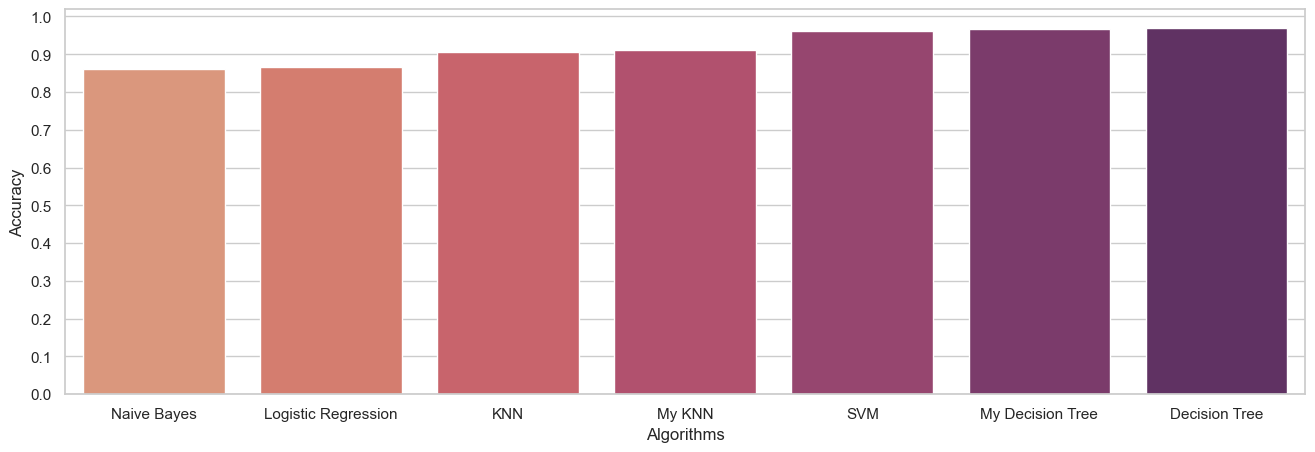

<IPython.core.display.Javascript object>

In [39]:
accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1]))

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(
    x=list(accuracies.keys()),
    y=list(accuracies.values()),
    palette=sns.color_palette("flare", len(accuracies)),
)
plt.show()

### Confusion Matrices

In [40]:
y_pred_nb = nb_pipe.predict(X_test)
y_pred_lr = lr_pipe.predict(X_test)
y_pred_knn = knn_pipe.predict(X_test)
y_pred_my_knn = myknn_pipe.predict(X_test)
y_pred_svm = svm_pipe.predict(X_test)
y_pred_mydt = mydt_pipe.predict(X_test)
y_pred_dt = dt_pipe.predict(X_test)

<IPython.core.display.Javascript object>

In [41]:
from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_myknn = confusion_matrix(y_test, y_pred_my_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_mydt = confusion_matrix(y_test, y_pred_mydt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

<IPython.core.display.Javascript object>

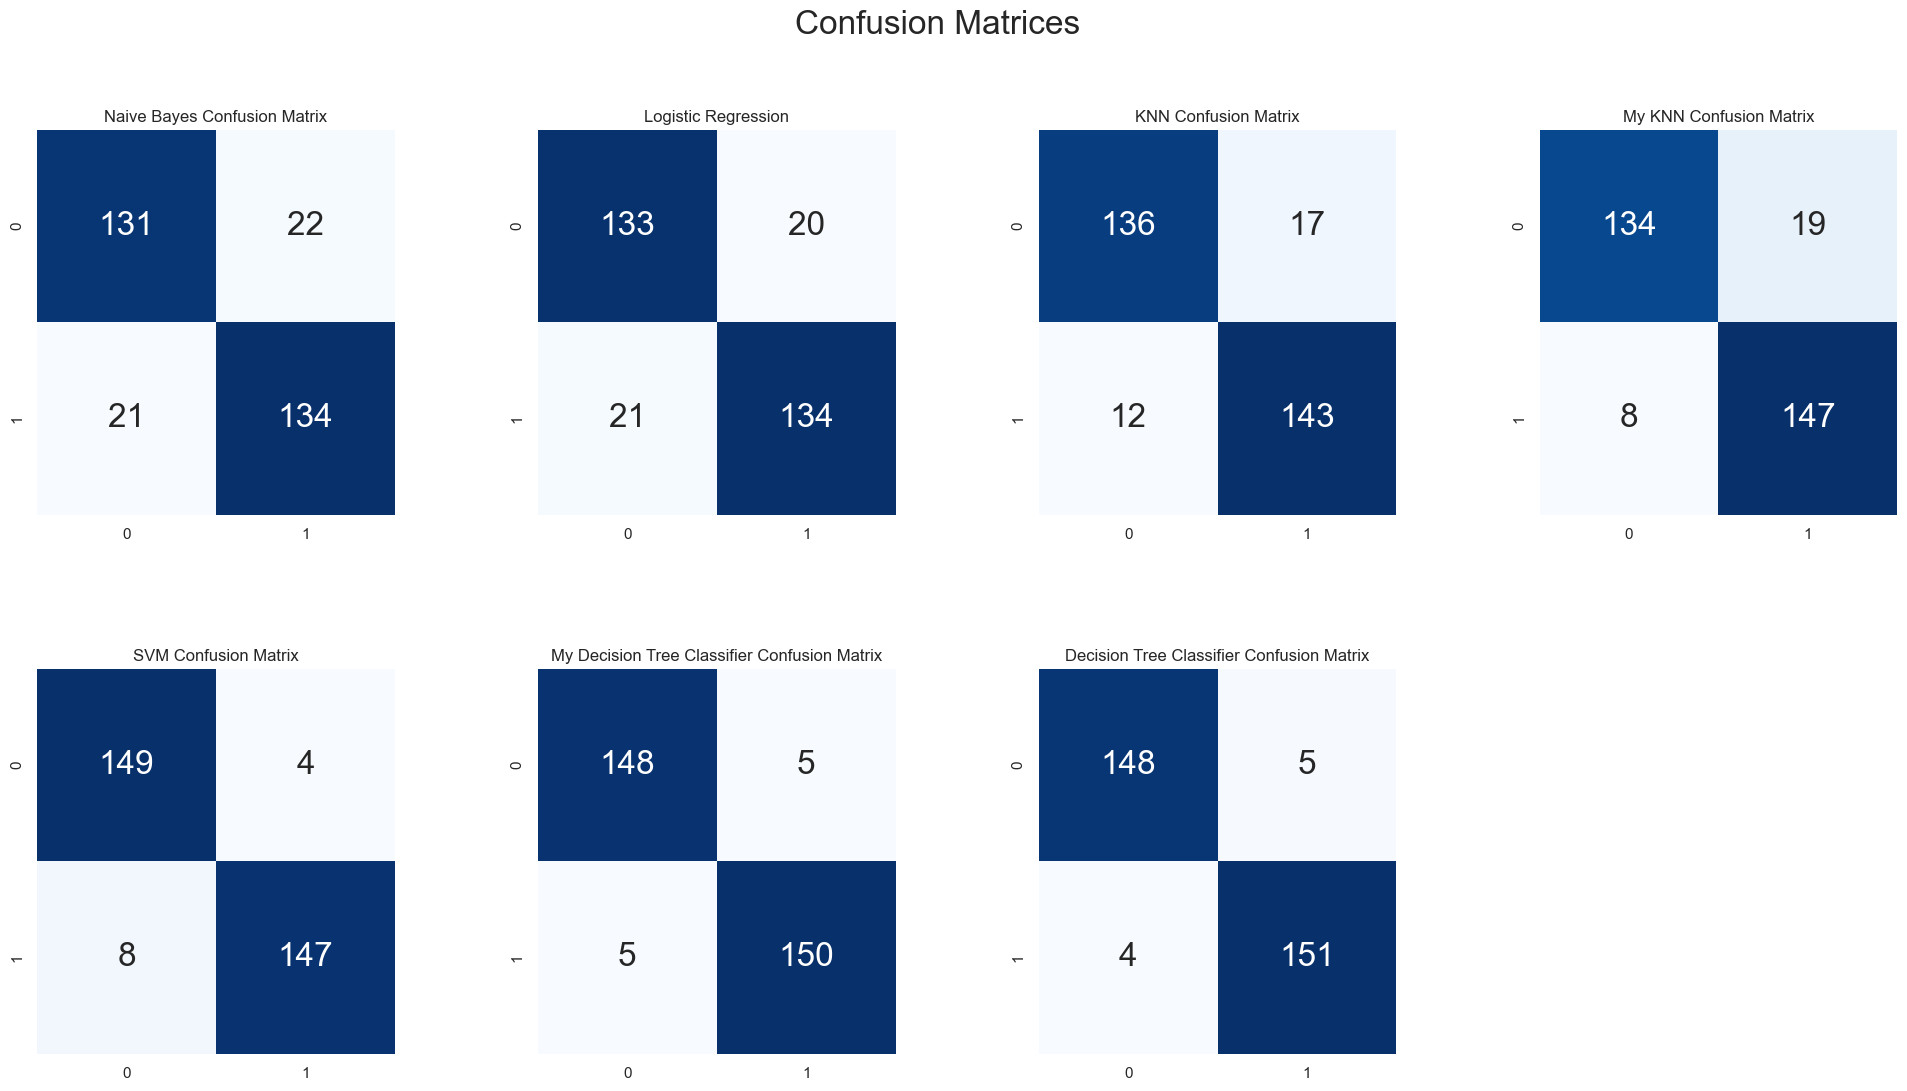

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2, 4, 1)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(
    cm_nb, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 2)
plt.title("Logistic Regression")
sns.heatmap(
    cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 3)
plt.title("KNN Confusion Matrix")
sns.heatmap(
    cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 4)
plt.title("My KNN Confusion Matrix")
sns.heatmap(
    cm_myknn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 5)
plt.title("SVM Confusion Matrix")
sns.heatmap(
    cm_svm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 6)
plt.title("My Decision Tree Classifier Confusion Matrix")
sns.heatmap(
    cm_mydt, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 7)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(
    cm_dt, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.show()

### Вывод

Как и предполагалось, классификатор на основе решающего дерева показал наилучший результат на данном датасете. Можно отметить, что полученная реализация дерева незначительно уступает версии из `sklearn`, а полученная реализация  KNN превосходит библиотечную версию. В целом, все рассмотренные классификаторы выдают приемлемые результаты.

# Banknote Authentication

Данные были извлечены из изображений подлинных и поддельных банкнот. Требуется по характеристикам банкноты определить её подлинность. Скачать датасет можно [здесь](https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data). Инструмент Wavelet Transform использовался для извлечения признаков из изображений.

In [43]:
df = pd.read_csv("../data/banknote/BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<IPython.core.display.Javascript object>

### Характеристики 

- variance: variance of Wavelet Transformed image (continuous)
- skewness: skewness of Wavelet Transformed image (continuous)
- curtosis: curtosis of Wavelet Transformed image (continuous)
- entropy: entropy of image (continuous)
- class

## EDA

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


<IPython.core.display.Javascript object>

In [45]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

<IPython.core.display.Javascript object>

In [46]:
df["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

<IPython.core.display.Javascript object>

Классы сбалансированы

In [47]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


<IPython.core.display.Javascript object>

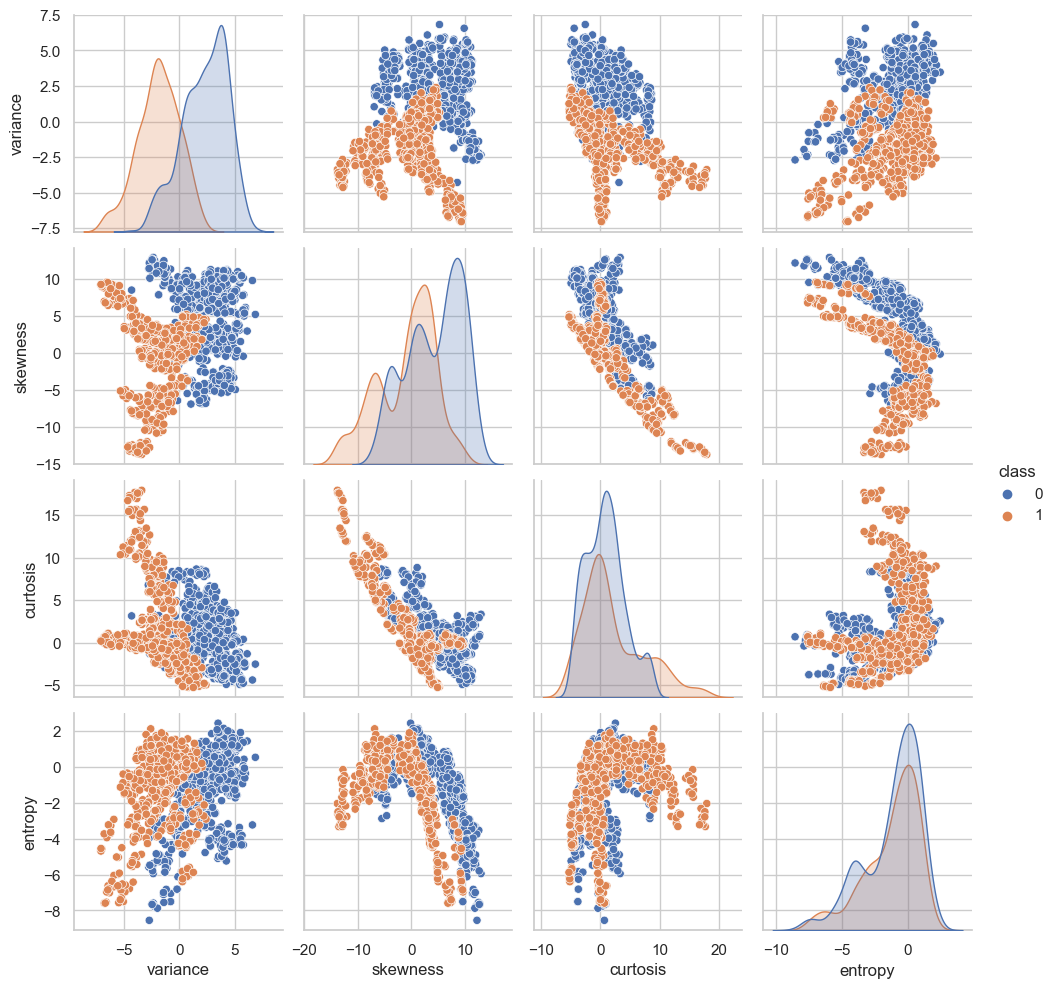

<IPython.core.display.Javascript object>

In [48]:
sns.pairplot(df, hue="class")

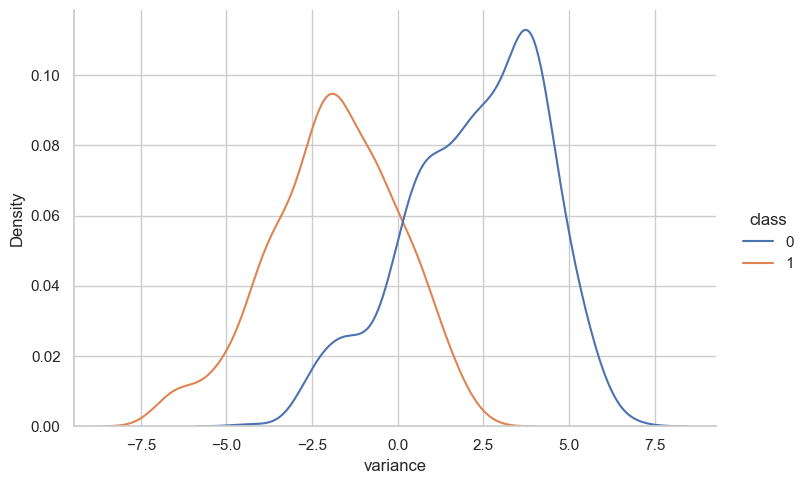

<IPython.core.display.Javascript object>

In [49]:
ax = sns.displot(x="variance", data=df, kind="kde", hue="class", height=5, aspect=1.5)
plt.show()

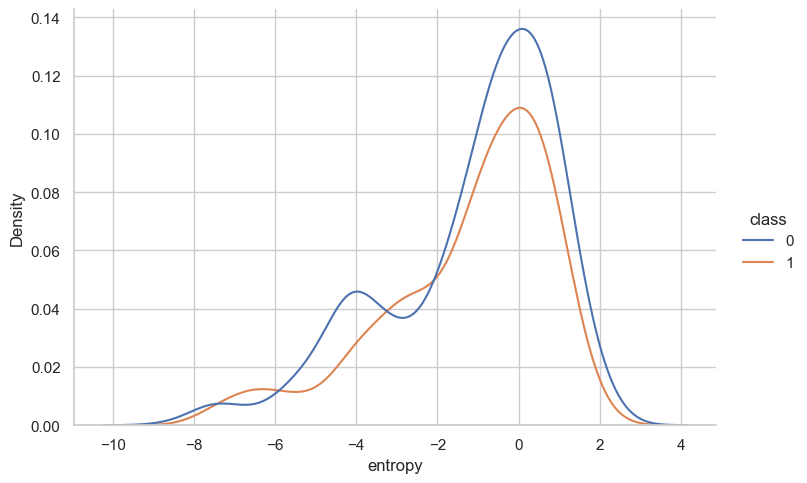

<IPython.core.display.Javascript object>

In [50]:
ax = sns.displot(x="entropy", data=df, kind="kde", hue="class", height=5, aspect=1.5)
plt.show()

Можно заметить, что variance нулевого класса в среднем меньше, чем variance первого. Также стоит отметить, что энтропия обоих классов распределена примерно одинаково.

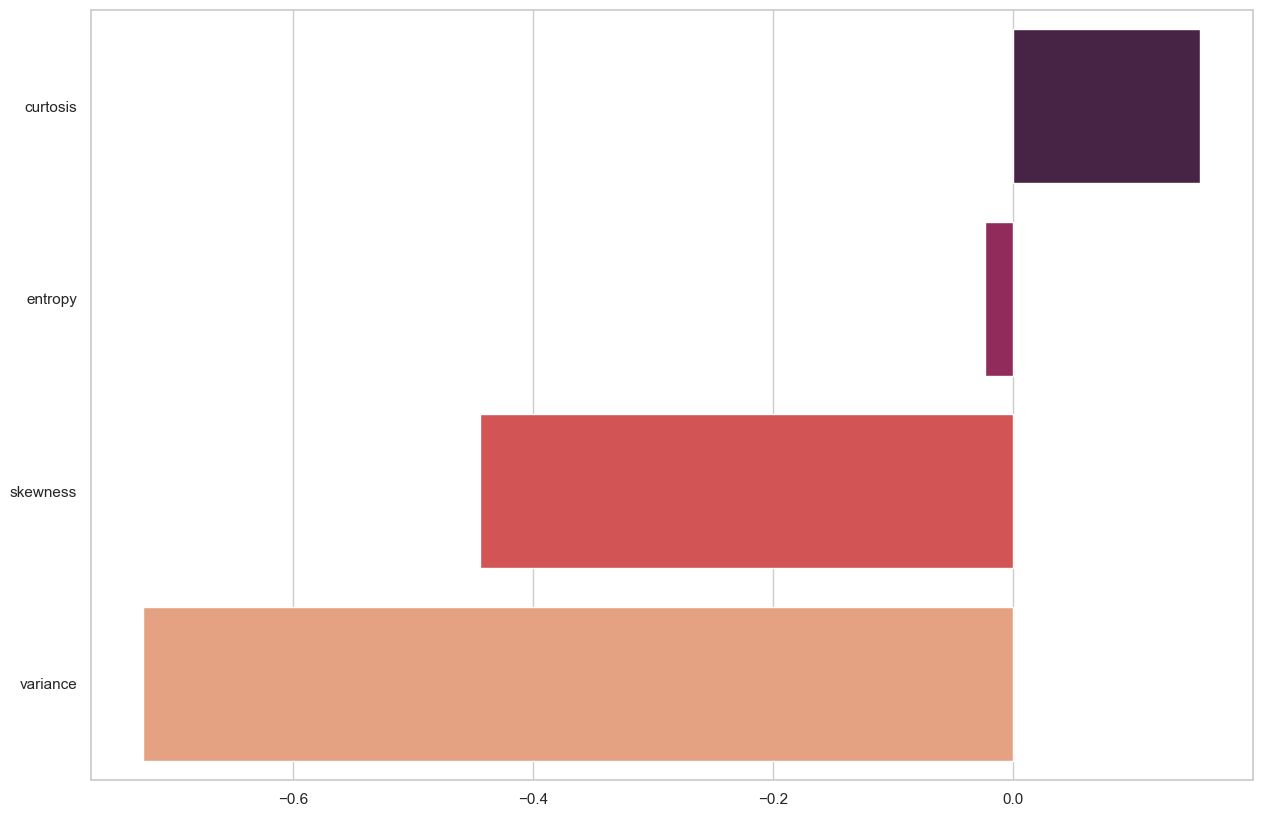

<IPython.core.display.Javascript object>

In [51]:
y = df["class"]
X = df.drop(columns=["class"])


correlations = X.corrwith(y).sort_values(ascending=False)
palette = sns.color_palette("rocket", correlations.size)
plot = sns.barplot(y=correlations.index, x=correlations, palette=palette)
plot.figure.set_size_inches(15, 10)

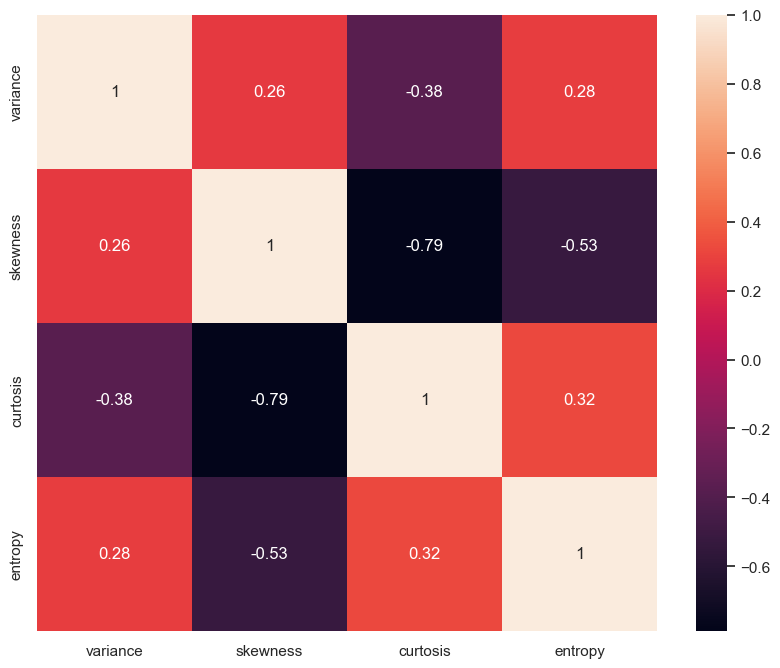

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True)
plt.show()

Видна сильная корреляция целевой переменной с variance, и умеренная -- с skewness. 

## Построение моделей

In [53]:
y = df["class"]
X = df.drop(columns=["class"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

<IPython.core.display.Javascript object>

### RFE and Encoding

Воспользуемся написанными ранее пайплайнами, изменив лишь `column_transformer`.

In [54]:
def create_column_transformer():
    column_transformer = ColumnTransformer(
        [
            ("scaling", StandardScaler(), X.columns),
        ]
    )
    return column_transformer

<IPython.core.display.Javascript object>

In [55]:
accuracies = {}

<IPython.core.display.Javascript object>

### Logistic Regression

In [56]:
Cs = np.logspace(-5, 3, 20)
searcher = GridSearchCV(
    create_logistic_regression(column_transformer=create_column_transformer()),
    [{"classification__C": Cs}],
    scoring="f1",
    cv=10,
)
searcher.fit(X_train, y_train)

best_C = searcher.best_params_["classification__C"]

<IPython.core.display.Javascript object>

In [57]:
lr_pipe = create_logistic_regression(
    best_C, column_transformer=create_column_transformer()
)
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["Logistic Regression"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.9909


<IPython.core.display.Javascript object>

### Decision Tree

In [58]:
depths = np.arange(7, 15)
min_samples_splits = [2, 5, 7]
min_samples_leafs = [1, 3, 5]

searcher = GridSearchCV(
    create_decision_tree(column_transformer=create_column_transformer()),
    [
        {
            "classification__max_depth": depths,
            "classification__min_samples_split": min_samples_splits,
            "classification__min_samples_leaf": min_samples_leafs,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_depth = searcher.best_params_["classification__max_depth"]
best_min_samples_split = searcher.best_params_["classification__min_samples_split"]
best_min_samples_leaf = searcher.best_params_["classification__min_samples_leaf"]

<IPython.core.display.Javascript object>

In [59]:
dt_pipe = create_decision_tree(
    best_depth,
    best_min_samples_split,
    best_min_samples_leaf,
    column_transformer=create_column_transformer(),
)
dt_pipe.fit(X_train, y_train)
y_pred = dt_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["Decision Tree"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.9891


<IPython.core.display.Javascript object>

### My Decision Tree

In [60]:
depths = np.arange(7, 15)
min_samples_splits = [2, 5, 7]
min_samples_leafs = [1, 3, 5]

searcher = GridSearchCV(
    create_my_decision_tree(column_transformer=create_column_transformer()),
    [
        {
            "classification__max_depth": depths,
            "classification__min_samples_split": min_samples_splits,
            "classification__min_samples_leaf": min_samples_leafs,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_depth = searcher.best_params_["classification__max_depth"]
best_min_samples_split = searcher.best_params_["classification__min_samples_split"]
best_min_samples_leaf = searcher.best_params_["classification__min_samples_leaf"]

<IPython.core.display.Javascript object>

In [61]:
mydt_pipe = create_my_decision_tree(
    best_depth,
    best_min_samples_split,
    best_min_samples_leaf,
    column_transformer=create_column_transformer(),
)
mydt_pipe.fit(X_train, y_train)
y_pred = mydt_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["My Decision Tree"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.9854


<IPython.core.display.Javascript object>

### KNN

In [65]:
n_neighbors = [1, 3, 5, 7, 9, 11]
searcher = GridSearchCV(
    create_knn(column_transformer=create_column_transformer()),
    [
        {
            "classification__n_neighbors": n_neighbors,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_n_neighbors = searcher.best_params_["classification__n_neighbors"]

<IPython.core.display.Javascript object>

In [67]:
knn_pipe = create_knn(best_n_neighbors, column_transformer=create_column_transformer())
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["KNN"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 1.0000


<IPython.core.display.Javascript object>

### My KNN

In [62]:
ks = [3, 5, 7, 9, 11]

searcher = GridSearchCV(
    create_my_knn(column_transformer=create_column_transformer()),
    [
        {
            "classification__k": ks,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_k = searcher.best_params_["classification__k"]

<IPython.core.display.Javascript object>

In [63]:
myknn_pipe = create_my_knn(best_k, column_transformer=create_column_transformer())
myknn_pipe.fit(X_train, y_train)
y_pred = myknn_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["My KNN"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 1.0000


<IPython.core.display.Javascript object>

### Naive Bayes

In [68]:
var_smoothing = np.logspace(0, -9, num=50)
searcher = GridSearchCV(
    create_nb(column_transformer=create_column_transformer()),
    [
        {
            "classification__var_smoothing": var_smoothing,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_var_smoothing = searcher.best_params_["classification__var_smoothing"]

<IPython.core.display.Javascript object>

In [69]:
nb_pipe = create_nb(best_var_smoothing, create_column_transformer())
nb_pipe.fit(X_train, y_train)
y_pred = nb_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["Naive Bayes"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.8506


<IPython.core.display.Javascript object>

### SVM

In [70]:
Cs = np.logspace(-5, 3, 20)
searcher = GridSearchCV(
    create_svm(column_transformer=create_column_transformer()),
    [{"classification__C": Cs}],
    scoring="f1",
    cv=10,
)
searcher.fit(X_train, y_train)
best_C = searcher.best_params_["classification__C"]

<IPython.core.display.Javascript object>

In [71]:
svm_pipe = create_svm(best_C, column_transformer=create_column_transformer())
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["SVM"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 1.0000


<IPython.core.display.Javascript object>

## Сравнение моделей

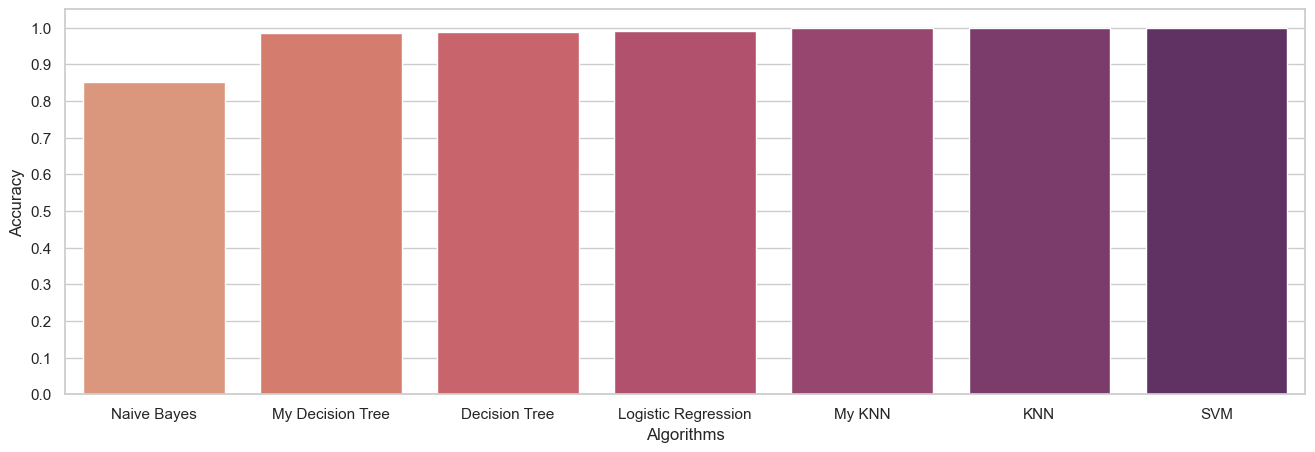

<IPython.core.display.Javascript object>

In [72]:
accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1]))

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(
    x=list(accuracies.keys()),
    y=list(accuracies.values()),
    palette=sns.color_palette("flare", len(accuracies)),
)
plt.show()

In [73]:
y_pred_nb = nb_pipe.predict(X_test)
y_pred_lr = lr_pipe.predict(X_test)
y_pred_knn = knn_pipe.predict(X_test)
y_pred_my_knn = myknn_pipe.predict(X_test)
y_pred_svm = svm_pipe.predict(X_test)
y_pred_mydt = mydt_pipe.predict(X_test)
y_pred_dt = dt_pipe.predict(X_test)

<IPython.core.display.Javascript object>

In [74]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_myknn = confusion_matrix(y_test, y_pred_my_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_mydt = confusion_matrix(y_test, y_pred_mydt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

<IPython.core.display.Javascript object>

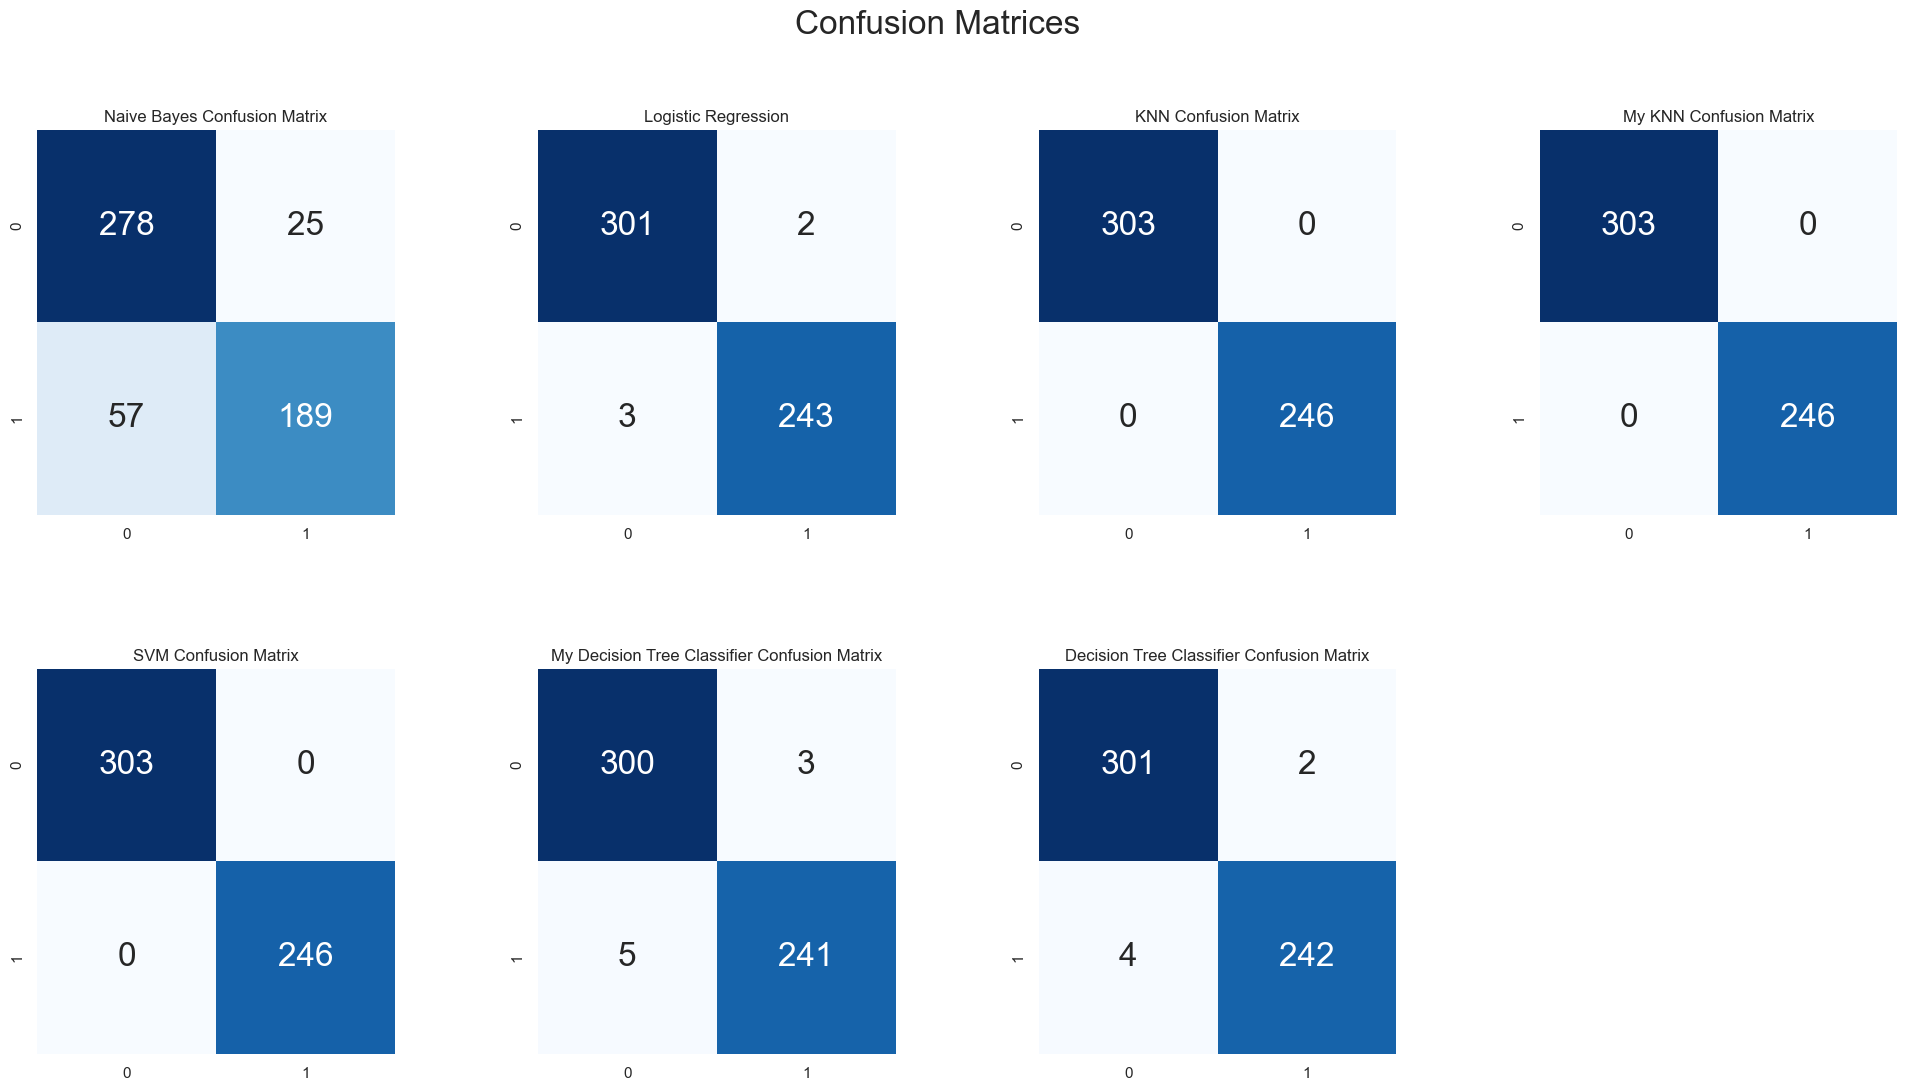

<IPython.core.display.Javascript object>

In [75]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2, 4, 1)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(
    cm_nb, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 2)
plt.title("Logistic Regression")
sns.heatmap(
    cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 3)
plt.title("KNN Confusion Matrix")
sns.heatmap(
    cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 4)
plt.title("My KNN Confusion Matrix")
sns.heatmap(
    cm_myknn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 5)
plt.title("SVM Confusion Matrix")
sns.heatmap(
    cm_svm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 6)
plt.title("My Decision Tree Classifier Confusion Matrix")
sns.heatmap(
    cm_mydt, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 7)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(
    cm_dt, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.show()

### Вывод

Все модели, за исключением Naive Bayeses, показали примерно одинаковые очень высокие результаты, что вызвано, скорее всего, простотой данной задачи. Важно, однако, отметить, что в данном случае деревья решения показали немного более низкие результаты, чем более простые модели, такие как KNN, Logistic Regression и SVM. Скорее всего, это связано со склонностью деревьев к переобучению. 